#### Enhance image quality to deal with varying lighting conditions.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def display_image(image):
    plt.imshow(image)
    plt.show()
    return

def display_image_gray(image):
    plt.imshow(image,cmap='gray')
    plt.show()
    return

In [5]:
def adjust_gamma(image, gamma=1.0):
    #inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

In [6]:
def brightness_adjustment(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    enhanced_channel = image[:,:,0] 
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
    enhanced_channel_clahe = clahe.apply(enhanced_channel)
    enhanced_image = cv2.merge((enhanced_channel_clahe, image[:,:,1], image[:,:,2]))
    image = adjust_gamma(enhanced_image, gamma=0.5)
    image = cv2.cvtColor(enhanced_image, cv2.COLOR_LAB2BGR)
    return image

In [7]:
def lightness_pipline(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_brightness = brightness_adjustment(image)
    _, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title('Original')
    ax[0].axis('off')
    ax[1].imshow(image_brightness)
    ax[1].set_title('Enhanced')
    ax[1].axis('off')
    plt.show()

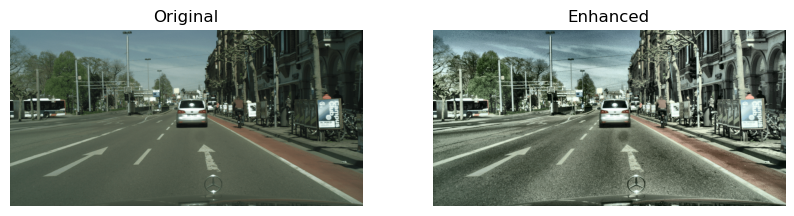

In [8]:
image_path = "images/image_2.png"
lightness_pipline(image_path)